# Day 08. Exercise 04
# Regression

## 0. Imports

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [32]:
df = pd.read_csv('../data/checker_regression.csv')

In [33]:
df = df.fillna(0)

In [34]:
X = df.drop(['AVG(diff)', 'uid'], axis=1)
y = df['AVG(diff)']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [36]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_rmse, test_rmse = [], []
    for train_idx, test_idx in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)
        train_rmse.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test_fold, y_test_pred)))
    for i in range(n_splits):
        print(f'train - {train_rmse[i]} | test - {test_rmse[i]}')
    avg_test_rmse = np.mean(test_rmse)
    print(f'Average RMSE on crossval is {avg_test_rmse}')

In [37]:
print('Linear Regression:')
crossval(10, X_train, y_train, LinearRegression())

Linear Regression:
train - 43.85193506275826 | test - 42.01528915581881
train - 41.801016176679624 | test - 58.19069641798876
train - 44.69553999765828 | test - 34.892720193433675
train - 38.84549642903113 | test - 76.60149754412575
train - 44.860797582621885 | test - 31.904314868671182
train - 44.855033493587875 | test - 30.369016640380945
train - 42.07183083893711 | test - 56.10331212526736
train - 45.6755157436544 | test - 16.54400016939582
train - 43.60670981884092 | test - 45.85548116615201
train - 44.2670184108396 | test - 39.06886806726505
Average RMSE on crossval is 43.15451963484993


In [38]:
print('Decision Tree Regressor:')
crossval(10, X_train, y_train, DecisionTreeRegressor(max_depth=5, random_state=21))

Decision Tree Regressor:
train - 15.951539265483806 | test - 36.99012309183636
train - 12.05122117539056 | test - 38.58966965609665
train - 12.921582837652013 | test - 33.47635981803677
train - 0.0 | test - 60.36467571414655
train - 12.958608152595913 | test - 21.28334420951606
train - 14.172846542758414 | test - 23.43345187262574
train - 16.65806485097007 | test - 36.60840517173764
train - 9.610251786188508 | test - 71.57332940056288
train - 9.304158405592826 | test - 60.09094072659711
train - 13.67659026263934 | test - 46.33618096764845
Average RMSE on crossval is 42.87464806288042


In [39]:
print('Random Forest Regressor:')
crossval(10, X_train, y_train, RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21))

Random Forest Regressor:
train - 14.388980213656279 | test - 22.904899040674536
train - 14.08370442109272 | test - 40.26362372976199
train - 14.03673111880095 | test - 38.26198236161764
train - 12.024615385793538 | test - 58.178615769949424
train - 14.719802173904668 | test - 23.735827773095973
train - 15.50409832408609 | test - 9.565665693858715
train - 14.805370579231832 | test - 27.332911218962828
train - 12.854871232750863 | test - 57.020533082065825
train - 13.495696250840465 | test - 39.07289544200975
train - 14.17194137669018 | test - 33.93114841361351
Average RMSE on crossval is 35.02681025256103


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [40]:
lr_model = LinearRegression().fit(X_train, y_train)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=21).fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21).fit(X_train, y_train)

In [41]:
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

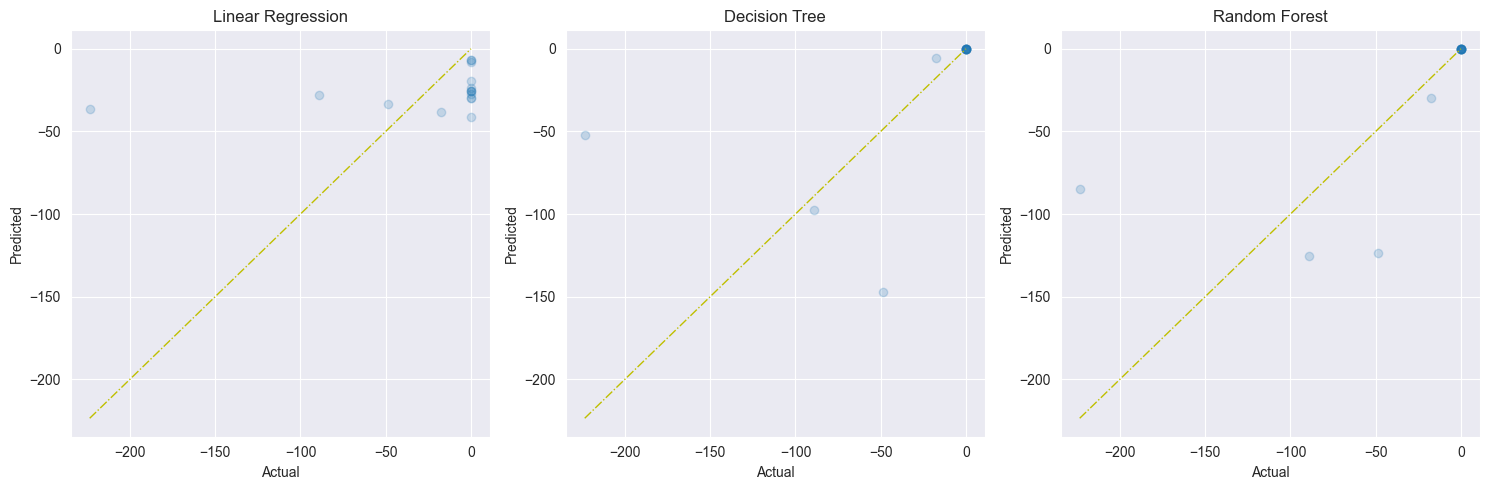

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y-.', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y-.', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y-.', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

## Answer: Ideally, the graph will show all points lying exactly on the dashed line (y = x) along the diagonal, indicating perfect forecasts where the predicted values ​​match the actual values ​​perfectly.